In [1]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
path = '../../data_me/'
paramchar_me= "tmax20_Nq2_Nc20_amp0.1000_kappa0.0200_wq5.3040_anh15915494.1500_wc7.5000_wd7.5000_ms1e-04_dimexp20_qb[1]_00_TRSM0.d"
times_me = np.loadtxt(path+"N_"+paramchar_me)[:,0]
photons_me = np.loadtxt(path+"N_"+paramchar_me)[:,1]
pplt_me = np.loadtxt(path+"PPLT_"+paramchar_me)

path = '../../data_mac/data_0211/'
paramchar_cav1= "nl2_n1_1_E0.50E+00_dtadd0.30_1.00_8_ar0.0_g0.000_gam0.022670_nm250_p0.5E-05_wq5.304_wc7.500_bc2.400_5.100_7.500_12.600_bw4.000_mr0.25_0.25_0.25_wd7.500_ad0.0000_anh159.155_dt0.0100_errl0.1E-03_lsfe14_qb1_cv1.0_tmax60"
dyn_cav1 = da.dynamics(2,path, paramchar_cav1)

dyns={}
paramchar= "nl2_n1_1_E0.50E+00_dtadd0.30_1.00_8_ar0.0_g0.250_gam0.022670_nm250_p0.5E-05_wq5.304_wc7.500_bc2.400_5.100_7.500_12.600_bw4.000_mr0.25_0.25_0.25_wd7.500_ad0.1000_anh159.155_dt0.0100_errl0.1E-03_lsfe14_qb1_cv0.0_tmax20"
dyns[1] = da.dynamics(2,path, paramchar)
paramchar= "nl2_n2_2_E0.50E-01_dtadd0.40_1.00_8_ar0.0_g0.250_gam0.022670_nm250_p0.5E-05_wq5.304_wc7.500_bc2.400_5.100_7.500_12.600_bw4.000_mr0.25_0.25_0.25_wd7.500_ad0.1000_anh159.155_dt0.0100_errl0.1E-03_lsfe14_qb1_cv0.0_tmax21"
dyns[2] = da.dynamics(2,path, paramchar)
paramchar= "nl2_n2_20_E0.50E-01_dtadd0.20_1.00_8_ar0.0_g0.250_gam0.022670_nm250_p0.5E-05_wq5.304_wc7.500_bc2.400_5.100_7.500_12.600_bw4.000_mr0.25_0.25_0.25_wd7.500_ad0.1000_anh159.155_dt0.0100_errl0.1E-03_lsfe14_qb1_cv0.0_tmax20"
dyns[20] = da.dynamics(2,path, paramchar)

## Decay rate calibration


-- fitted decay rate/(2*np.pi) = 0.020044103745934728 GHz


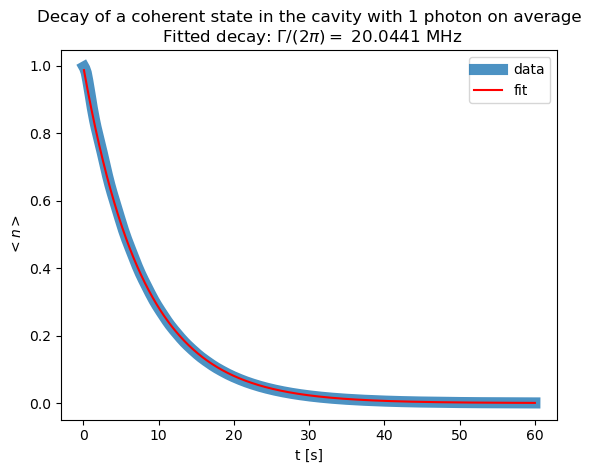

In [3]:
from scipy.optimize import curve_fit

def exp_decay(t,gamma):
    return np.exp( -gamma*t )

opt, _ = curve_fit( exp_decay, dyn_cav1.times, dyn_cav1.nk[:,0] )
Gamma=opt[0]

print( '-- fitted decay rate/(2*np.pi) =', Gamma/(2*np.pi), "GHz" )

plt.plot( dyn_cav1.times[1:], dyn_cav1.nk[1:,0], linewidth=8, alpha=0.8,label='data'  )
plt.plot( dyn_cav1.times[1:], exp_decay( dyn_cav1.times[1:], opt[0]), c='red', label='fit'  )
plt.ylabel( "$<n>$" )
plt.xlabel('t [s]')
plt.title('Decay of a coherent state in the cavity with 1 photon on average\n Fitted decay: $\Gamma/(2\pi)=$ '+str(np.round(1e3*Gamma/(2*np.pi),5))+' MHz')
plt.legend()

## CAVITY PHOTON NUMBER and ERROR versus time

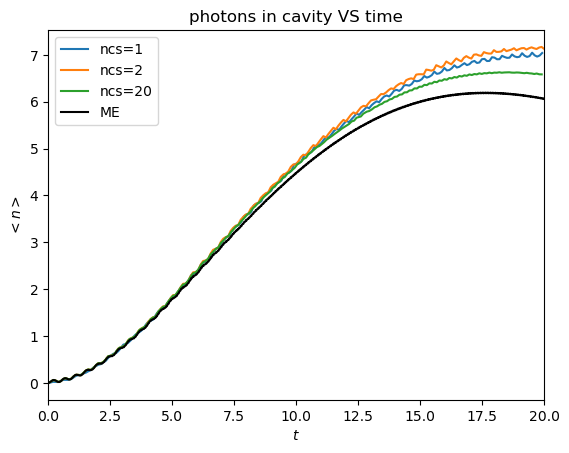

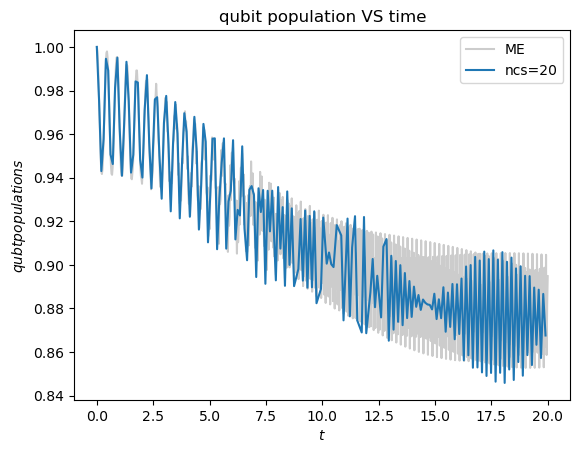

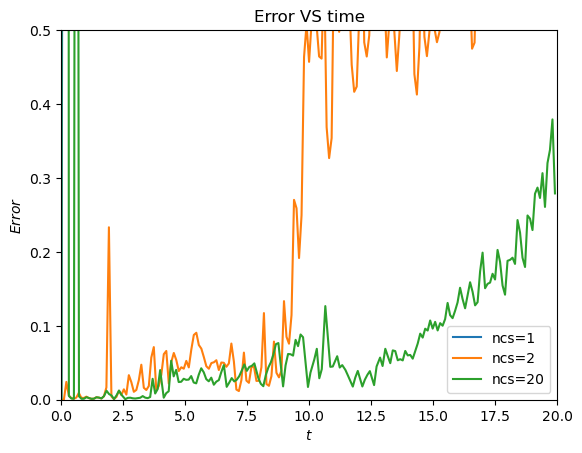

In [4]:
for n in dyns:
    plt.plot( dyns[n].times, dyns[n].nk[:,0], label='ncs='+str(n)  )
    
plt.plot( times_me, photons_me, label='ME',c='black'  )    
plt.xlim(0,20)
plt.ylabel( "$<n>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.show()

plt.plot( times_me, pplt_me[:,2], label='ME',c='black', alpha=0.2  )   
for n in [20]:
    plt.plot( dyns[n].times, dyns[n].pplt[:,2], label='ncs='+str(n)  )
plt.ylabel( "$qubt populations$" )
plt.xlabel( "$t$" )
plt.title( "qubit population VS time"  )
plt.legend()
plt.show()


for n in dyns:
    plt.plot( dyns[n].times, dyns[n].error, label='ncs='+str(n)  )
plt.xlim(0,20)
plt.ylim(0,0.5)
plt.ylabel( "$Error$" )
plt.xlabel( "$t$" )
plt.title( "Error VS time"  )
plt.legend()
plt.show()

## **Bath photon spectrum**

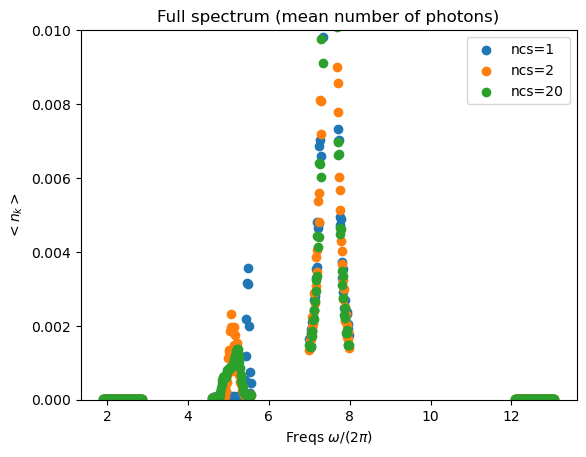

In [5]:
for n in dyns:
    plt.scatter( dyns[n].wk/(2*np.pi), dyns[n].nk[-1,1:], label='ncs='+str(n)  )
    
plt.ylim(0,0.01)
plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()

# **Wigner function of the final state**

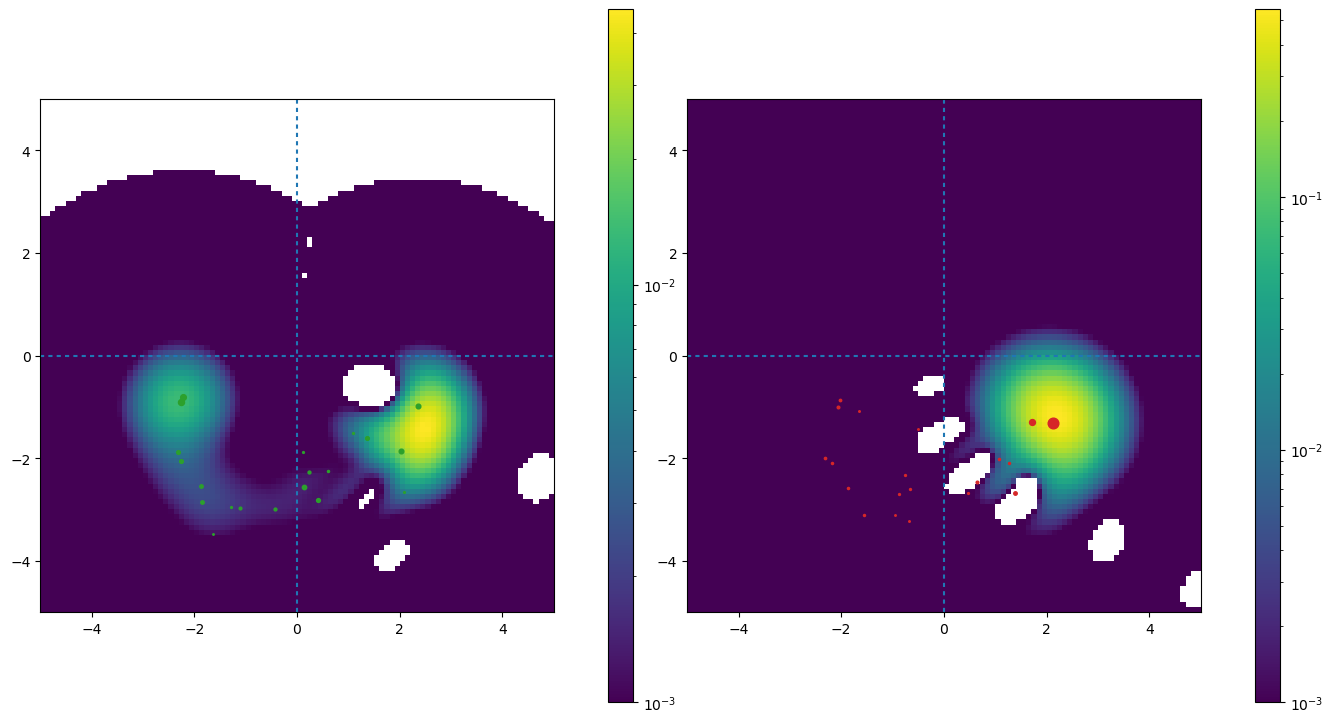

In [16]:
dyns[20].plot_split_wigners(xmin=-5 , log_min=0.001)